In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Housing.csv')
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

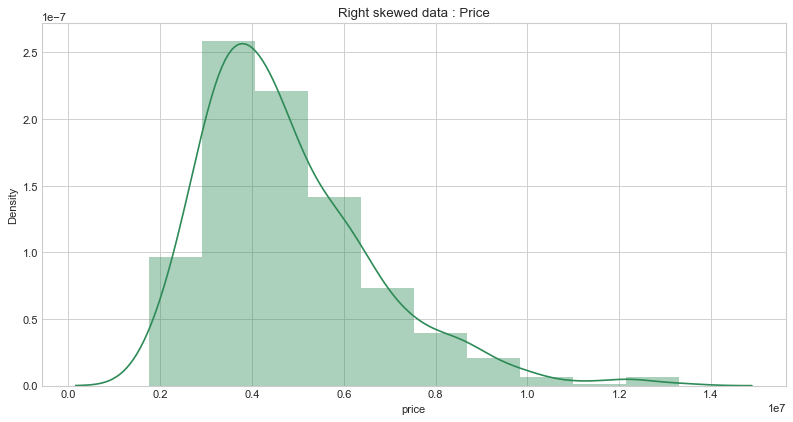

In [4]:
plt.figure(figsize = (12, 6), dpi = 80)
sns.distplot(data['price'], bins = 10, color = 'seagreen')
plt.title('Right skewed data : Price');

- Data looks right skewed.
- lets try to normalize the distribution by taking log.

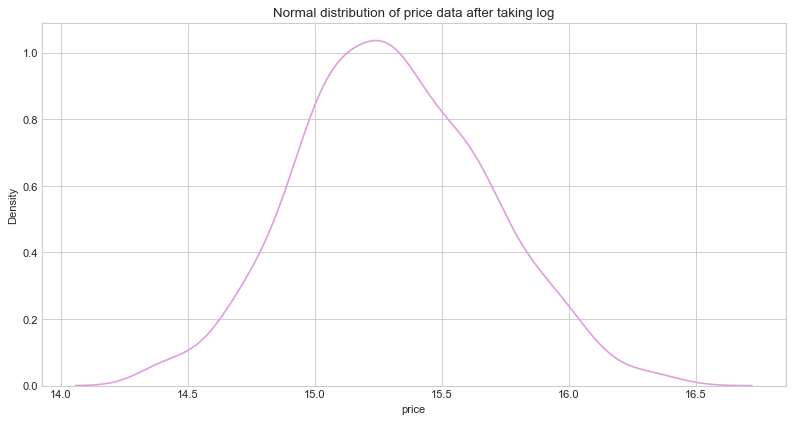

In [5]:
plt.figure(figsize = (12, 6), dpi = 80)
sns.distplot(np.log(data['price']), hist = False, color = 'plum')
plt.title('Normal distribution of price data after taking log');

- Now the data looks normally distributed.

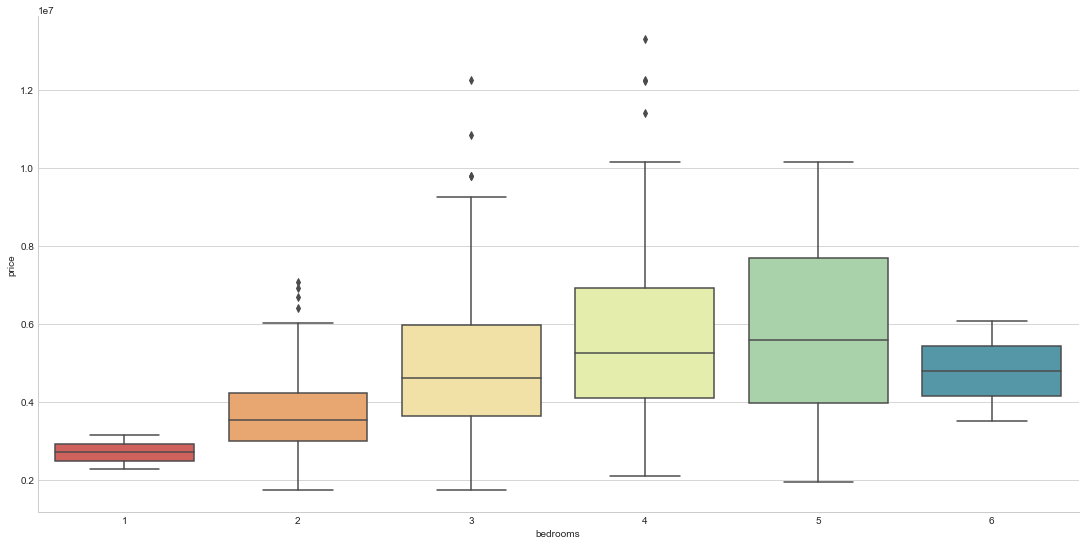

In [6]:
sns.catplot(x = 'bedrooms', y = 'price', data = data, kind = 'box', palette = 'Spectral', height = 7.5, aspect = 2);

## Prepare data :

In [7]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning' , 'prefarea']

In [8]:
def binarymap(x) :
    return x.map({'yes' : 1, 'no' : 0})

In [9]:
data[varlist] = data[varlist].apply(binarymap)
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished


In [10]:
status = pd.get_dummies(data['furnishingstatus'], drop_first = True)
status.head(3)

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0


In [11]:
data = pd.concat([data, status], 1)
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0


In [12]:
data.drop('furnishingstatus', 1, inplace = True)
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0


In [13]:
X = data.drop('price', 1)
y = data['price']

print(f'X columns : {list(X.shape)}')
# -----------------------------------
print(f'y columns : {list(y.shape)}')

X columns : [545, 13]
y columns : [545]


In [14]:
X = X.astype('int64')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   area             545 non-null    int64
 1   bedrooms         545 non-null    int64
 2   bathrooms        545 non-null    int64
 3   stories          545 non-null    int64
 4   mainroad         545 non-null    int64
 5   guestroom        545 non-null    int64
 6   basement         545 non-null    int64
 7   hotwaterheating  545 non-null    int64
 8   airconditioning  545 non-null    int64
 9   parking          545 non-null    int64
 10  prefarea         545 non-null    int64
 11  semi-furnished   545 non-null    int64
 12  unfurnished      545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


## Identify numeric columns & categorical columns :

In [15]:
num_cols = [cols for cols in X.columns if X[cols].dtype in ['int64', 'float64']]
# ------------------------------------------------------------------------------------------------------
# cat_cols = [cols for cols in X.columns if X[cols].nunique() < 5 and X[cols].dtype in ['object', 'bool']]
# ------------------------------------------------------------------------------------------------------
print(f'Numeric : {list(num_cols)}')


Numeric : ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'semi-furnished', 'unfurnished']


## Scale Numeric values :

In [16]:
from sklearn.preprocessing import MinMaxScaler
# ----------------------------------------------------------
scaler = MinMaxScaler().fit(X[num_cols])
X[num_cols]  = scaler.transform(X[num_cols])
# ----------------------------------------------------------
X[num_cols].head(3)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0
2,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0


## Train test split : 

In [17]:
from sklearn.model_selection import train_test_split as tts
# -------------------------------------------------------------------------------------------------
train_inputs, val_inputs, train_targets, val_targets = tts(X, y, test_size = .25, random_state = 42) 

In [18]:
train_inputs.shape, val_inputs.shape, train_targets.shape, val_targets.shape

((408, 13), (137, 13), (408,), (137,))

## Train a Ridge Regression Model 🐱‍🏍

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# ---------------------------------------------------------------------------

model = Ridge(alpha=0.01, random_state = 42).fit(train_inputs, train_targets)

train_preds = model.predict(train_inputs)

# ---------------------------------------------------------------------------
print(f'Training set accuracy : {round(model.score(train_inputs, train_preds),3)}')
print('-'*30)
print(f'RMSE : {round(mean_squared_error(train_targets, train_preds, squared = False),3)}')

Training set accuracy : 1.0
------------------------------
RMSE : 992393.778


In [20]:
val_preds = model.predict(val_inputs)
val_rmse  = mean_squared_error(val_targets, val_preds, squared = False)
# ----------------------------------------------------------------------------
print(f'Validation set accuracy : {round(model.score(val_inputs, val_preds),3)}')
print('-'*30)
print(f'RMSE : {round(val_rmse, 3)}')

Validation set accuracy : 1.0
------------------------------
RMSE : 1245890.911


In [21]:
weights_df = pd.DataFrame({'Features' : np.append(num_cols, 1), 
                          'Weights' : np.append(model.coef_, model.intercept_)})
weights_df.sort_values('Weights', ascending = False)

,Features,Weights
0,area,3.484871e+06
2,bathrooms,3.368854e+06
13,1,2.251938e+06
3,stories,1.159129e+06
9,parking,7.771809e+05
8,airconditioning,7.692510e+05
7,hotwaterheating,6.910658e+05
10,prefarea,6.274527e+05
6,basement,4.009152e+05
4,mainroad,3.730090e+05


## Linear Regression :

In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs = 5).fit(train_inputs, train_targets)
train_preds = model.predict(train_inputs)

train_rmse = mean_squared_error(train_preds, train_targets, squared = False)
train_acc = model.score(train_inputs, train_preds)

print(f'Train accuracy : {round(train_acc, 3)}')
print('-'*30)
print(f'Train RMSE : {round(train_rmse, 3)}')

Train accuracy : 1.0
------------------------------
Train RMSE : 992393.472


In [23]:
val_preds = model.predict(val_inputs)
val_rmse = mean_squared_error(val_preds, val_targets, squared = False) 
val_acc = model.score(val_inputs, val_preds)

print(f'Validation accuracy : {round(val_acc, 3)}')
print('-'*30)
print(f'Validation RMSE : {round(val_rmse, 3)}')

Validation accuracy : 1.0
------------------------------
Validation RMSE : 1245949.129


In [25]:
importance_df = pd.DataFrame({'Features' : np.append(val_inputs.columns,1), 
                              'Weights': np.append(model.coef_, model.intercept_)})
importance_df.sort_values('Weights', ascending = False)

,Features,Weights
0,area,3.489015e+06
2,bathrooms,3.372187e+06
13,1,2.251648e+06
3,stories,1.159280e+06
9,parking,7.766440e+05
8,airconditioning,7.689947e+05
7,hotwaterheating,6.913306e+05
10,prefarea,6.274233e+05
6,basement,4.010088e+05
4,mainroad,3.726509e+05


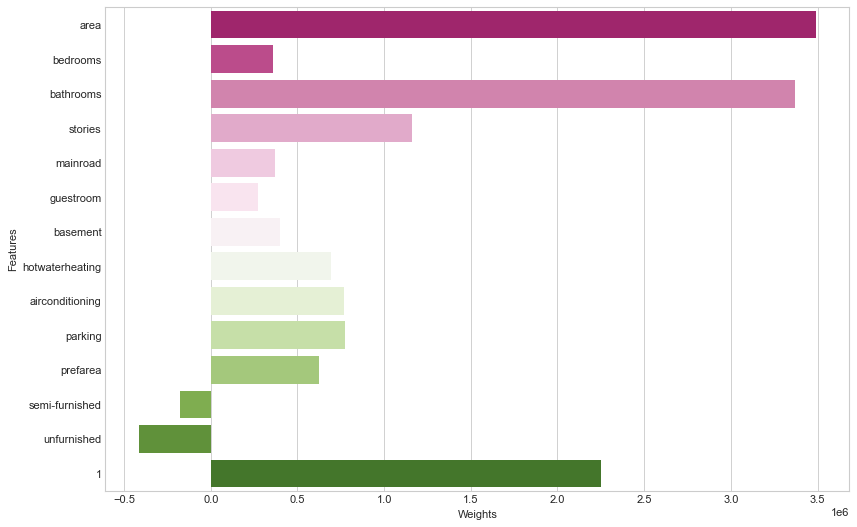

In [33]:
plt.figure(figsize = (12, 8), dpi = 80)
sns.barplot(data = importance_df, x = 'Weights', y = 'Features', palette = 'PiYG');

## DecisionTree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
tree = DecisionTreeRegressor(random_state = 42).fit(train_inputs, train_targets)

In [42]:
# --------------------------- Training data : Fit & Predict ---------------------------- #

tree_train_preds = tree.predict(train_inputs)
tree_rmse = mean_squared_error(train_preds, train_targets, squared = False)
tree_acc = tree.score(train_inputs, tree_train_preds)

# ----------------------------------------------------------------------------------------

# --------------------------- Validation data : Fit & Predict -------------------------- #

tree_val_preds = tree.predict(val_inputs)
tree_val_rmse = mean_squared_error(tree_val_preds, val_targets, squared = False)
tree_val_acc = tree.score(val_inputs, tree_val_preds)

# ---------------------------------- Print Outoput ------------------------------------- #

print(f'Train RMSE : {round(tree_rmse, 3)} \nValidation RMSE : {round(tree_val_rmse, 3)}')
print('-'*30)
print(f'Training Accuracy : {tree_acc} \nValidation Accuracy : {tree_val_acc}')

Train RMSE : 992393.472 
Validation RMSE : 1775395.988
------------------------------
Training Accuracy : 1.0 
Validation Accuracy : 1.0


## Feature Importance

In [46]:
importance = pd.DataFrame({'Features' : train_inputs.columns, 
                           'Importance': tree.feature_importances_}).sort_values('Importance', ascending = False)
importance

,Features,Importance
0,area,0.482783
2,bathrooms,0.158851
9,parking,0.071025
1,bedrooms,0.054750
3,stories,0.048592
8,airconditioning,0.039569
12,unfurnished,0.031814
5,guestroom,0.026259
10,prefarea,0.024457
6,basement,0.024282


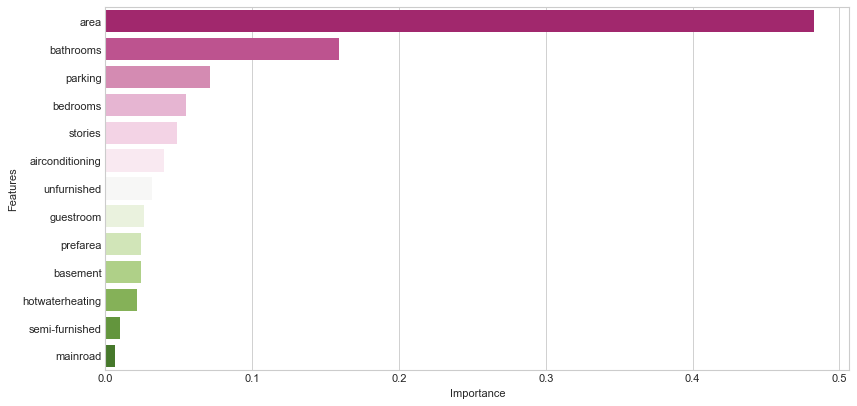

In [57]:
plt.figure(figsize = (12, 6), dpi = 80)
sns.barplot(data = importance, x = 'Importance', y = 'Features', palette = 'PiYG');

In [56]:
importance[importance['Importance' ] > 0.03] 

,Features,Importance
0,area,0.482783
2,bathrooms,0.158851
9,parking,0.071025
1,bedrooms,0.054750
3,stories,0.048592
8,airconditioning,0.039569
12,unfurnished,0.031814
